# Video 2 - Combining the Dataset

# Task 1 - Combining the Dataset

In [1]:
pip install --upgrade matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
#check pandas version
pd.__version__

'1.5.3'

In [4]:
#changing the work directory
#os.chdir('/Users/admin/Desktop/Synergyx Dataset')

## Analysing POS Data

In [5]:
#reading the Pos_Data and using parse_dates to interpret Date column as dates
pos = pd.read_excel("POS_Data.xlsx", parse_dates=['Date'])
pos.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Manufacturer,Sector,Category,Segment,Brand,Product
0,SKU1009,2021-01-02,0.0,0,NaN,0,Synergix solutions,Personal Care,Beauty Products,Makeup,RadiantGlow,product_description_SKU1009
1,SKU1009,2021-01-09,0.0,0,NaN,0,Synergix solutions,Personal Care,Beauty Products,Makeup,RadiantGlow,product_description_SKU1009
2,SKU1009,2021-01-16,0.0,0,NaN,0,Synergix solutions,Personal Care,Beauty Products,Makeup,RadiantGlow,product_description_SKU1009
3,SKU1009,2021-01-23,0.0,0,NaN,0,Synergix solutions,Personal Care,Beauty Products,Makeup,RadiantGlow,product_description_SKU1009
4,SKU1009,2021-01-30,0.0,0,NaN,0,Synergix solutions,Personal Care,Beauty Products,Makeup,RadiantGlow,product_description_SKU1009


In [6]:
#check datatypes of pos columns
pos.dtypes

SKU_ID                  object
Date            datetime64[ns]
Page_traffic           float64
Revenue($)               int64
Unit_price             float64
Units_sold               int64
Manufacturer            object
Sector                  object
Category                object
Segment                 object
Brand                   object
Product                 object
dtype: object

In [7]:
#get a summary of numerical features of the dataset
pos.describe()

,Page_traffic,Revenue($),Unit_price,Units_sold
count,31185.000000,31185.000000,19635.000000,31185.000000
mean,2053.829695,14386.877505,22.038169,702.274363
std,1979.574340,13427.614446,9.849729,647.676402
min,0.000000,0.000000,0.103030,0.000000
25%,0.000000,0.000000,16.311504,0.000000
50%,1963.000000,14952.000000,20.746141,765.000000
75%,3647.000000,25670.000000,25.423036,1224.000000
max,10696.000000,48572.000000,94.133971,3386.000000


In [8]:
#get a summary of categorical features of the pos dataframe by adding a parameter "include = 'O'", where O stands for 'object'
pos.describe(include = 'O')

,SKU_ID,Manufacturer,Sector,Category,Segment,Brand,Product
count,31185,31185,31185,31185,31185,31185,31185
unique,297,1,1,1,3,1,297
top,SKU1009,Synergix solutions,Personal Care,Beauty Products,Makeup,RadiantGlow,product_description_SKU1009
freq,105,31185,31185,31185,17220,31185,105


### Initial Observations from pos dataframe
1. There are 31185 observations in the product column.

2. There are 297 products or SKU_IDs that Synergix is selling.

3. There is only 1 unique value for the majority of the categorical columnS so we can go ahead and delete the following categorical columns-'Manufacturer', 'Sector', 'Category', and 'Brand'. A column which just has one value will not provide any meaningful information to the machine learning model.

Also in 'Product' column we just have a string which does not add any value. So let's delete that as well.

In [9]:
#delete these columns-'Manufacturer', 'Sector', 'Category', 'Product' and 'Brand'
pos = pos.drop(['Manufacturer', 'Sector', 'Category','Brand','Product'], axis = 1)

In [10]:
#check the first 5 rows of the data
pos.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup


In [11]:
#get a summary of numerical variables of the pos dataframe
pos.describe()

,Page_traffic,Revenue($),Unit_price,Units_sold
count,31185.000000,31185.000000,19635.000000,31185.000000
mean,2053.829695,14386.877505,22.038169,702.274363
std,1979.574340,13427.614446,9.849729,647.676402
min,0.000000,0.000000,0.103030,0.000000
25%,0.000000,0.000000,16.311504,0.000000
50%,1963.000000,14952.000000,20.746141,765.000000
75%,3647.000000,25670.000000,25.423036,1224.000000
max,10696.000000,48572.000000,94.133971,3386.000000


In [12]:
pos.describe(include ='all')

/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/1375406292.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  pos.describe(include ='all')


,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment
count,31185,31185,31185.000000,31185.000000,19635.000000,31185.000000,31185
unique,297,105,NaN,NaN,NaN,NaN,3
top,SKU1009,2021-01-02 00:00:00,NaN,NaN,NaN,NaN,Makeup
freq,105,297,NaN,NaN,NaN,NaN,17220
first,NaN,2021-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2053.829695,14386.877505,22.038169,702.274363,NaN
std,NaN,NaN,1979.574340,13427.614446,9.849729,647.676402,NaN
min,NaN,NaN,0.000000,0.000000,0.103030,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,16.311504,0.000000,NaN


In [13]:
#get a summary of categorical variables of the pos dataframe
pos.describe(include = 'O')

,SKU_ID,Segment
count,31185,31185
unique,297,3
top,SKU1009,Makeup
freq,105,17220


### Further observations from pos dataframe
1. There more than 10k missing values in Unit_price.

2. The data is spread scross 2 years as seen in the min and max value of 'Date' column above. But we still do not know if the dates are at a daily, weekly or a monthly level!! Let's investigate this.

In [14]:
#check the first 25 rows of the data
pos.head(25)

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup
5,SKU1009,2021-02-06,0.0,0,NaN,0,Makeup
6,SKU1009,2021-02-13,0.0,0,NaN,0,Makeup
7,SKU1009,2021-02-20,0.0,0,NaN,0,Makeup
8,SKU1009,2021-02-27,0.0,0,NaN,0,Makeup
9,SKU1009,2021-03-06,0.0,0,NaN,0,Makeup


In [15]:
#extract day of the week
pos['weekday'] = pos['Date'].dt.dayofweek
pos['weekday'].value_counts()

5    31185
Name: weekday, dtype: int64

In [16]:
#import datetime and calender libraries
import datetime, calendar

In [17]:
#checking the number assigned to days of the week by calender library
print (calendar.MONDAY, calendar.TUESDAY, calendar.WEDNESDAY, calendar.THURSDAY, calendar.FRIDAY, calendar.SATURDAY, calendar.SUNDAY)

0 1 2 3 4 5 6


We can see that python denotes Monday as 0, Tuesday as 1 and so on.

In [18]:
#check the first 5 rows of the data
pos.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,5
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,5
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,5
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,5
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,5


### Final obsevations from pos datafrme
1. All data is aggregated at a weekly level.
2. All the dates belong to Saturdays.
3. There are more than 10K missing values in Unit_price which we will treat after combining the tables.
4. In the POS dataframe we only have one product related information, that is, Segment. Rest of the product related data maybe in the Product_Attribute_Data.



# Video 3 - Combining Product Attribute Data with POS Data

<p style = 'color:green'><b>Run all the cells above before you begin</b><p>

## Analysing Product Data

In [19]:
#reading product attribute data and using parse_dates to interpret Date column as dates
product= pd.read_excel("Product_Attribute_Data.xlsx", parse_dates=['Date'])
product.head()

,SKU_ID,Date,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Product_availability,Image_Count,Video_Count,Bullet_Count,Title_Count,Description_Length
0,SKU1009,2021-01-09,52.0,28.0,68.0,158.0,984.0,Buy Box Winner - Owned,12,0,5,85,58
1,SKU1009,2021-01-10,52.0,28.0,68.0,159.0,989.0,Buy Box Winner - Owned,12,0,5,85,58
2,SKU1009,2021-01-11,52.0,28.0,69.0,160.0,994.0,Buy Box Winner - Owned,12,0,5,85,58
3,SKU1009,2021-01-12,52.0,28.0,69.0,161.0,1000.0,Buy Box Winner - Owned,12,0,5,85,58
4,SKU1009,2021-01-13,52.0,28.0,70.0,162.0,1005.0,Buy Box Winner - Owned,12,0,5,85,58


In [20]:
#get a summary of numercal variables of the product dataframe
product.describe()

,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Video_Count,Bullet_Count,Title_Count,Description_Length
count,85975.000000,84988.000000,84957.000000,84687.000000,84379.000000,99331.000000,99331.0,99331.000000,99331.000000,99331.000000
mean,75.290038,53.501400,144.977318,295.173073,1937.907501,7.166454,0.0,6.560943,107.603820,137.196756
std,46.039553,32.414642,90.798913,187.666308,1269.711505,4.948544,0.0,0.989463,28.611333,61.836353
min,10.000000,7.000000,16.000000,31.000000,153.000000,0.000000,0.0,4.000000,62.000000,54.000000
25%,40.000000,29.000000,76.000000,153.000000,998.000000,2.000000,0.0,6.000000,84.000000,65.000000
50%,68.000000,49.000000,129.000000,261.000000,1695.000000,8.000000,0.0,6.000000,100.000000,129.000000
75%,99.000000,71.000000,192.000000,392.000000,2596.000000,11.000000,0.0,7.000000,126.000000,209.000000
max,337.000000,240.000000,679.000000,1418.000000,9707.000000,16.000000,0.0,8.000000,173.000000,221.000000


In [21]:
#get a summary of categorical variables of the product dataframe
product.describe(include = 'O')

,SKU_ID,Product_availability
count,99331,99331
unique,297,6
top,SKU1410,Buy Box Winner - Owned
freq,435,79823


In [22]:
# my code to check for date
product.describe(include = 'all')

/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/1284465032.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  product.describe(include = 'all')


,SKU_ID,Date,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Product_availability,Image_Count,Video_Count,Bullet_Count,Title_Count,Description_Length
count,99331,99331,85975.000000,84988.000000,84957.000000,84687.000000,84379.000000,99331,99331.000000,99331.0,99331.000000,99331.000000,99331.000000
unique,297,729,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN
top,SKU1410,2022-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,Buy Box Winner - Owned,NaN,NaN,NaN,NaN,NaN
freq,435,165,NaN,NaN,NaN,NaN,NaN,79823,NaN,NaN,NaN,NaN,NaN
first,NaN,2021-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,75.290038,53.501400,144.977318,295.173073,1937.907501,NaN,7.166454,0.0,6.560943,107.603820,137.196756
std,NaN,NaN,46.039553,32.414642,90.798913,187.666308,1269.711505,NaN,4.948544,0.0,0.989463,28.611333,61.836353
min,NaN,NaN,10.000000,7.000000,16.000000,31.000000,153.000000,NaN,0.000000,0.0,4.000000,62.000000,54.000000
25%,NaN,NaN,40.000000,29.000000,76.000000,153.000000,998.000000,NaN,2.000000,0.0,6.000000,84.000000,65.000000


### Initial Observations from product dataframe
1. There are 99331 observations in the product dataframe.
2. There are 297 unique values in SKU_ID, just as in pos dataframe. 
3. The dates are spread across 2 years.
4. The following columns have a lot of missing values - '1_Star_Rating',	'2_Star_Rating', '3_Star_Rating', '4_Star_Rating', '5_Star_Rating'.
5. In the video count column, we only have 1 value which is 0. You can observe this by looking at the min and max value in the above cell. Let's remove this column.

In [23]:
#drop 'Video_Count' column
product = product.drop(['Video_Count'], axis = 1)

In [24]:
#extract days of the week for product data
product['weekday'] = product['Date'].dt.dayofweek
product['weekday'].value_counts()

5    14323
6    14168
0    14168
1    14168
2    14168
3    14168
4    14168
Name: weekday, dtype: int64

We can see that the data in the product dataframe is there for everyday of the week, and is spread uniformly. We need to aggregate it at a weekly level. Specifically, __we will adjust the dates to the next Saturday__ to be able to combine it with the pos dataframe. For this procedure, we will create a new column named - 'weekend_date' and use the lambda function to adjust the dates to the next saturday.

In [25]:
# Create a column 'weekend' that onverts all weekday dates to the next Saturaday data
product['weekend_date'] = product['Date'].apply(lambda x:x+datetime.timedelta((calendar.SATURDAY-x.weekday()) % 7 ))
product[product['SKU_ID'] == 'SKU1011'][['weekend_date', 'Date']][:20]

,weekend_date,Date
309,2021-01-02,2021-01-02
310,2021-01-09,2021-01-03
311,2021-01-09,2021-01-04
312,2021-01-09,2021-01-05
313,2021-01-09,2021-01-06
314,2021-01-09,2021-01-07
315,2021-01-09,2021-01-08
316,2021-01-09,2021-01-09
317,2021-01-16,2021-01-10
318,2021-01-16,2021-01-11


With this we have successfully adjusted the dates to the next saturday in the product dataframe. You can pause the video here and go through the explanation of the code used above.

### Explanation of the code
Here's a breakdown of what each part of the code does:

1. __product['Date']__: This gets the 'Date' column from the product DataFrame.

2. __.apply()__: This applies a function to each element in the 'Date' column.

3. __lambda x: x + datetime.timedelta(...)__: This is the function that is applied. It takes a date x as an argument.

4. __(calendar.SATURDAY-x.weekday()) % 7__: This calculates the number of days to add to get to the next Saturday.

    a) __x.weekday()__: Returns the day of the week as an integer (where Monday is 0 and Sunday is 6).
    
    b) __calendar.SATURDAY__: This is a constant equal to 5, which represents Saturday.
    
    c) The expression __(calendar.SATURDAY - x.weekday())__ computes the difference between Saturday and the current day of the week.
    
    d)__% 7__ ensures that the result is between 0 (if the date is already a Saturday) to 6 (if the date is a Sunday).
    
    
    
    
5. __datetime.timedelta(...)__: This creates a time delta, or difference, of a specified number of days.

The net effect of this code is that each date in the 'Date' column of the product DataFrame is adjusted to the next Saturday (or remains the same if it's already a Saturday)

In [26]:
# Checking the count of saturday in the weekend column
product['weekend_date'].dt.dayofweek.value_counts()

5    99331
Name: weekend_date, dtype: int64

### New Observations on product dataframe and aggregating the daily data to weekly
- We have got a column 'weekend_date', where all dates have been adjusted to the next saturday.

- But the dataframe is at a daily level. If we have to combine the data with the pos data, we need to transform the data by aggregating it at weekly level. 

- There are numerous different ways to aggregate the data as we require,such as, by taking the mean, the maximum value, or the latest value.

- Let's have a closer look at the product data to decide the appropriate aggregation. It would be better to check individual SKU_IDs at random. Let's simply take a SKU_ID, SKU1011. After running the cell you can pause the video for a couple of minutes to take a look at the results for SKU1011 and note down your observations.

In [27]:
#Quick look at SKU_1011
product[product['SKU_ID'] == 'SKU1011']

,SKU_ID,Date,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Product_availability,Image_Count,Bullet_Count,Title_Count,Description_Length,weekday,weekend_date
309,SKU1011,2021-01-02,29.0,21.0,49.0,99.0,694.0,Buy Box Winner - Owned,5,5,91,59,5,2021-01-02
310,SKU1011,2021-01-03,30.0,22.0,50.0,102.0,713.0,Buy Box Winner - Owned,5,5,91,59,6,2021-01-09
311,SKU1011,2021-01-04,31.0,23.0,52.0,106.0,732.0,Buy Box Winner - Owned,5,5,91,59,0,2021-01-09
312,SKU1011,2021-01-05,32.0,24.0,54.0,110.0,751.0,Buy Box Winner - Owned,5,5,91,59,1,2021-01-09
313,SKU1011,2021-01-06,33.0,25.0,56.0,113.0,770.0,Buy Box Winner - Owned,5,5,91,59,2,2021-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,SKU1011,2022-12-13,75.0,50.0,118.0,237.0,1672.0,Buy Box Winner - Owned,5,5,91,59,1,2022-12-17
684,SKU1011,2022-12-14,75.0,50.0,118.0,237.0,1672.0,Buy Box Winner - Owned,5,5,91,59,2,2022-12-17
685,SKU1011,2022-12-15,75.0,50.0,118.0,237.0,1672.0,Buy Box Winner - Owned,5,5,91,59,3,2022-12-17
686,SKU1011,2022-12-16,75.0,50.0,118.0,237.0,1672.0,Buy Box Winner - Owned,5,5,91,59,4,2022-12-17


### Observations from product dataframe at a SKU_ID level
1. The ratings are increasing with date or staying flat.
2. The following columns have the same value across all the dates- Image_Count, Bullet_Count, Title_Count, Description_Length.


In [28]:
#Quick look at SKU_1220
product[product['SKU_ID'] == 'SKU1220']

,SKU_ID,Date,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Product_availability,Image_Count,Bullet_Count,Title_Count,Description_Length,weekday,weekend_date
14461,SKU1220,2021-01-02,52.0,41.0,125.0,260.0,1614.0,Buy Box Winner - Owned,0,6,75,177,5,2021-01-02
14462,SKU1220,2021-01-03,52.0,41.0,125.0,260.0,1614.0,Buy Box Winner - Owned,0,6,75,177,6,2021-01-09
14463,SKU1220,2021-01-04,52.0,41.0,125.0,260.0,1614.0,Buy Box Winner - Owned,0,6,75,177,0,2021-01-09
14464,SKU1220,2021-01-05,52.0,41.0,125.0,260.0,1614.0,Buy Box Winner - Owned,0,6,75,177,1,2021-01-09
14465,SKU1220,2021-01-06,52.0,41.0,125.0,260.0,1614.0,Buy Box Winner - Owned,0,6,75,177,2,2021-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14771,SKU1220,2022-12-19,173.0,115.0,352.0,749.0,4809.0,Buy Box Winner - Owned,0,6,75,177,0,2022-12-24
14772,SKU1220,2022-12-20,176.0,117.0,359.0,762.0,4891.0,Buy Box Winner - Owned,0,6,75,177,1,2022-12-24
14773,SKU1220,2022-12-21,180.0,120.0,366.0,775.0,4972.0,Buy Box Winner - Owned,0,6,75,177,2,2022-12-24
14774,SKU1220,2022-12-22,183.0,122.0,373.0,788.0,5054.0,Buy Box Winner - Owned,0,6,75,177,3,2022-12-24


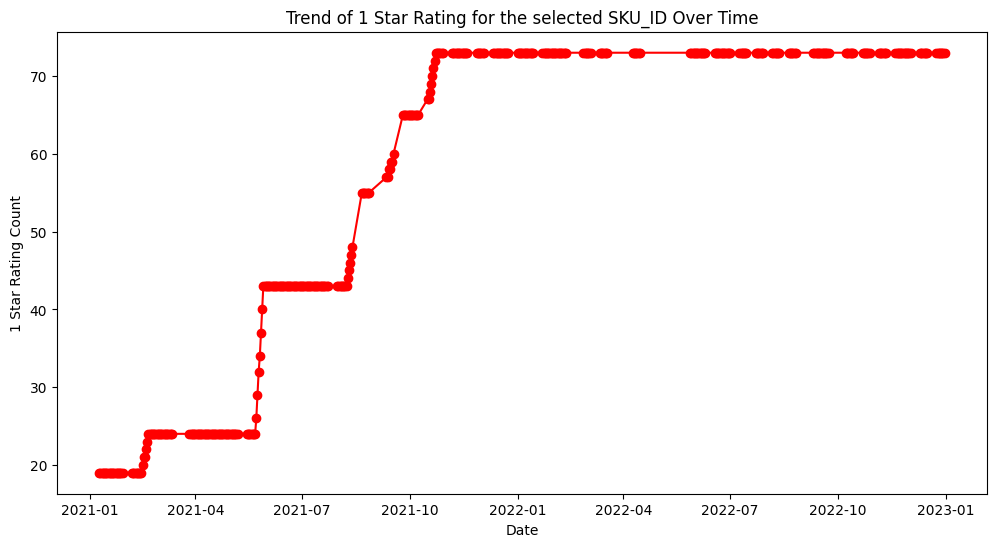

In [29]:
# Filter the data for SKU_ID of your choice
sku_level_data = product[product['SKU_ID'] == 'SKU1410']

# Plotting the trend of 1_Star_Rating for SKU1410 against the Date
plt.figure(figsize=(12, 6))
plt.plot(sku_level_data['Date'], sku_level_data['1_Star_Rating'], color='red', marker='o', linestyle='-')
plt.title("Trend of 1 Star Rating for the selected SKU_ID Over Time")
plt.xlabel("Date")
plt.ylabel("1 Star Rating Count")

plt.show()

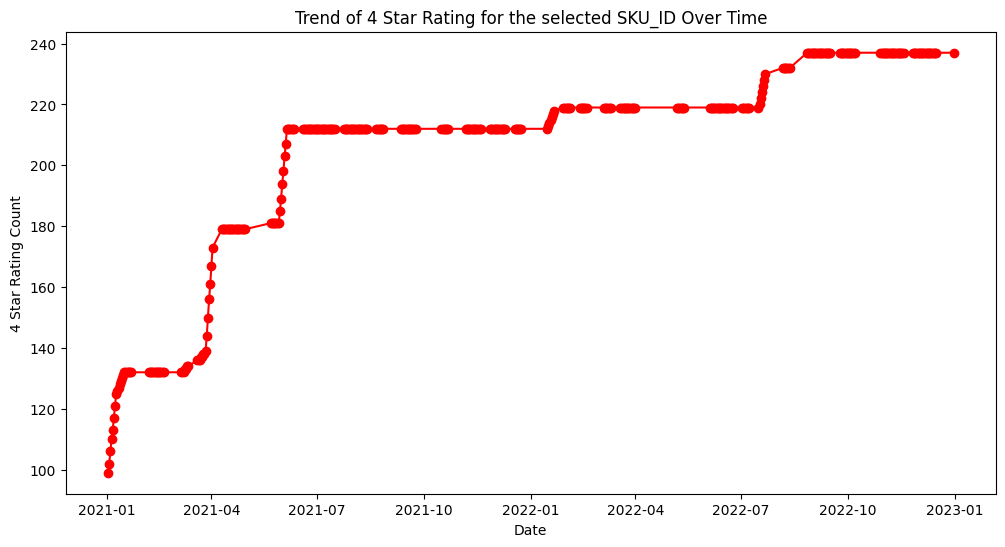

In [30]:
# Filter the data for SKU_ID of your choice
sku_level_data = product[product['SKU_ID'] == 'SKU1011']

# Plotting the trend of 1_Star_Rating for SKU1011 against the Date
plt.figure(figsize=(12, 6))
plt.plot(sku_level_data['Date'], sku_level_data['4_Star_Rating'], color='red', marker='o', linestyle='-')
plt.title("Trend of 4 Star Rating for the selected SKU_ID Over Time")
plt.xlabel("Date")
plt.ylabel("4 Star Rating Count")

plt.show()

__It's evident from this chart that, the ratings over time, either increase or remain consistent for all SKU_IDs, indicating that these ratings are cumulative.__ In simple words, all the five rating columns indicate the sum of ratings for the SKU_ID till that date and not the ratings for a SKU_ID for that week.

So, for a weekly aggregation, taking the maximum value of ratings for each week would be the most appropriate approach. This ensures that we capture the cumulative rating for the week for every SKU_ID.

Moving onto to columns such as Image_Count, Bullet_Count, Title_Count, and Description_Length, the values remain unchanged for a given SKU_ID across all dates. Thus, we can aggregte these columns by any method. For simplicity we will go with aggregating by maximum value.

So, let's proceed to aggregate the product data at a weekly level and use their maximum values.

In [31]:
#get the column names from product table to be aggregated at a weekly level
product.columns

Index(['SKU_ID', 'Date', '1_Star_Rating', '2_Star_Rating', '3_Star_Rating',
       '4_Star_Rating', '5_Star_Rating', 'Product_availability', 'Image_Count',
       'Bullet_Count', 'Title_Count', 'Description_Length', 'weekday',
       'weekend_date'],
      dtype='object')

In [32]:
#separate the column that needs to be aggregated
cols = ['1_Star_Rating', '2_Star_Rating', '3_Star_Rating',
       '4_Star_Rating', '5_Star_Rating', 'Image_Count',
       'Bullet_Count', 'Title_Count', 'Description_Length','weekday']

In [33]:
#grouping the product data, first by 'weekend_date' and then by 'SKU_ID' and taking the maximum value for each week and SKU ID for all columns in col
product_agg = product.groupby(['weekend_date','SKU_ID'])[cols].max().reset_index()

In [34]:
#checking the new dataframe
product_agg.head()

,weekend_date,SKU_ID,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Bullet_Count,Title_Count,Description_Length,weekday
0,2021-01-02,SKU1011,29.0,21.0,49.0,99.0,694.0,5,5,91,59,5
1,2021-01-02,SKU1014,46.0,22.0,42.0,77.0,409.0,0,5,79,99,5
2,2021-01-02,SKU1024,21.0,15.0,39.0,93.0,782.0,0,8,163,158,5
3,2021-01-02,SKU1025,28.0,7.0,45.0,102.0,786.0,2,6,90,62,5
4,2021-01-02,SKU1036,58.0,24.0,71.0,166.0,1239.0,12,8,126,221,5


In [35]:
product_agg.columns

Index(['weekend_date', 'SKU_ID', '1_Star_Rating', '2_Star_Rating',
       '3_Star_Rating', '4_Star_Rating', '5_Star_Rating', 'Image_Count',
       'Bullet_Count', 'Title_Count', 'Description_Length', 'weekday'],
      dtype='object')

In [36]:
#clearly we can see the difference between the shapes of the product an the new product_agg data frames
product.shape

(99331, 14)

In [37]:
#get the shape of the product_agg dataframe
product_agg.shape

(21915, 12)

In [38]:
pos.shape

(31185, 8)

In [39]:
pos.head(5)

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,5
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,5
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,5
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,5
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,5


In [40]:
#merging the product data and pos data
data = pd.merge(pos, product_agg, how='left', left_on=['Date','SKU_ID'],right_on=['weekend_date','SKU_ID'])
data.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday_x,weekend_date,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Bullet_Count,Title_Count,Description_Length,weekday_y
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,5,2021-01-09,52.0,28.0,68.0,158.0,984.0,12.0,5.0,85.0,58.0,5.0
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,5,2021-01-16,53.0,29.0,72.0,166.0,1022.0,12.0,5.0,85.0,58.0,6.0
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,5,2021-01-23,53.0,29.0,72.0,169.0,1040.0,12.0,5.0,85.0,58.0,6.0
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,5,2021-01-30,53.0,29.0,72.0,169.0,1040.0,12.0,5.0,85.0,58.0,6.0


In [41]:
#dropping the weekday and weekend variables since the data is already captured in 'Date'
data = data.drop([ 'weekend_date'], axis = 1)
data.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday_x,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Bullet_Count,Title_Count,Description_Length,weekday_y
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,5,52.0,28.0,68.0,158.0,984.0,12.0,5.0,85.0,58.0,5.0
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,5,53.0,29.0,72.0,166.0,1022.0,12.0,5.0,85.0,58.0,6.0
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,5,53.0,29.0,72.0,169.0,1040.0,12.0,5.0,85.0,58.0,6.0
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,5,53.0,29.0,72.0,169.0,1040.0,12.0,5.0,85.0,58.0,6.0


In [42]:
#check the shape of data
data.shape

(31185, 18)

In [43]:
data.describe(include='O')

,SKU_ID,Segment
count,31185,31185
unique,297,3
top,SKU1009,Makeup
freq,105,17220


# Video 4 - Combining all the tables in the Dataframe

<p style = 'color:green'><b>Run all the cells above before you begin</b><p>

## Analysing Search Data

In [44]:
#reading Search_Rank_Data and using parse_dates to interpret Date column as dates
search = pd.read_excel("Search_Rank_Data.xlsx", parse_dates=['Date'])
search.head()

,SKU_ID,Date,num_unique_Search_Terms,Organic Search Rank
0,SKU1009,2021-01-02,7,13.0
1,SKU1009,2021-01-09,8,22.0
2,SKU1009,2021-01-16,8,25.0
3,SKU1009,2021-01-23,8,15.0
4,SKU1009,2021-01-30,8,18.0


In [45]:
#get a summary of all numerical variables of the search table
search.describe()

,num_unique_Search_Terms,Organic Search Rank
count,25711.000000,25711.000000
mean,5.193186,19.025009
std,3.052156,11.679961
min,1.000000,3.000000
25%,3.000000,9.000000
50%,5.000000,18.000000
75%,7.000000,27.000000
max,19.000000,53.000000


In [46]:
#get a summary of all categorical variables of the search table
search.describe(include = 'O')

,SKU_ID
count,25711
unique,295
top,SKU1009
freq,105


### Observations from search dataframe
1. The search data is only there for 295 SKU_IDs as compared to 297 SKU_IDs in pos data.

2. Looking at the date column in search.head(), it seems like the data is at week level. We will verify this.

3. Just like pos data, the search data also begins from 2nd Jan 2021 and goes on till 31st Dec 2022.

4. We have 25711 records in search dataframe which is 5474 records less than the pos data(31185). This suggests that not all products have a record for every week.

In [47]:
#creating sets for SKU_IDs for both the data and search dataframe
data_set = set(data.SKU_ID.values)
search_set = set(search.SKU_ID.values)

In [48]:
#finding the SKU_IDs not in search dataframe
data_set - data_set.intersection(search_set)

{'SKU780', 'SKU952'}

'SKU780', and 'SKU952' are the 2 SKU_IDs that are not there in the search dataframe. This could mean eihter we do not have data for these 2 products or any activity related to search ranking for these 2 products did not happen. Ideally we would need to talk to the team and investigate this matter further. 

In [49]:
#extract the day of the week
search['Date'].dt.dayofweek.value_counts()

5    25711
Name: Date, dtype: int64

In [50]:
# The data is at a weekly level. Let's merge it with the data based on 'Dates' and 'SKU_ID'
data = pd.merge(data, search, how='left',on=['Date','SKU_ID'])
data.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday_x,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Bullet_Count,Title_Count,Description_Length,weekday_y,num_unique_Search_Terms,Organic Search Rank
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,13.0
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,5,52.0,28.0,68.0,158.0,984.0,12.0,5.0,85.0,58.0,5.0,8.0,22.0
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,5,53.0,29.0,72.0,166.0,1022.0,12.0,5.0,85.0,58.0,6.0,8.0,25.0
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,5,53.0,29.0,72.0,169.0,1040.0,12.0,5.0,85.0,58.0,6.0,8.0,15.0
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,5,53.0,29.0,72.0,169.0,1040.0,12.0,5.0,85.0,58.0,6.0,8.0,18.0


In [51]:
#check the shape
data.shape

(31185, 20)

## Analysing VPC Data

In [52]:
#reading the 'VPC_Data'and using parse_dates to interpret Date column as dates
vpc = pd.read_excel("VPC_Data.xlsx",parse_dates=['Date'])
vpc.head()

,SKU_ID,Date,Num_of_Promotions,Variable Spend on Promotion,Sum of Spend
0,SKU1009,2021-11-06,1,430,1071.309703
1,SKU1009,2021-11-13,1,348,860.905508
2,SKU1009,2021-11-20,1,291,714.049918
3,SKU1009,2021-11-27,1,143,325.593408
4,SKU1009,2022-03-05,1,29,79.058869


In [53]:
#getting a summary of numerical variables
vpc.describe()

,Num_of_Promotions,Variable Spend on Promotion,Sum of Spend
count,3194.000000,3194.000000,3194.000000
mean,1.014402,160.808078,407.362038
std,0.119160,167.875977,414.741065
min,1.000000,0.000000,0.000000
25%,1.000000,46.000000,123.256904
50%,1.000000,97.000000,252.476836
75%,1.000000,223.000000,567.022259
max,2.000000,1110.000000,2689.728363


In [54]:
#getting a summary of categorical variables
vpc.describe(include = 'O')

,SKU_ID
count,3194
unique,260
top,SKU852
freq,49


In [55]:
vpc['Date'].dt.dayofweek.value_counts()

5    3194
Name: Date, dtype: int64

### Observations from vpc dataframe
1. The vpc data is only there for 260 SKU_IDs as compared to 297 SKU_IDs in pos data. This means that, there are many products that do not have any coupon.
2. Looking at the date column in vpc.head(), it looks like the data is spread across the week.
3. The vpc dataframe has information only from 2nd Jan 2021 to 27th August 2022. This means not all products have coupons across all the dates.
4. We already have the sum of spend which is the total amount spent on promotions. 'Variable Spend on Promotion' is already a part of 'Sum of Spend' and hence it is not required.
5. For a specific date the max number of promotions is 2 and the min is 1.

In [56]:
#drop the Variable Spend on Promotion column
vpc = vpc.drop(["Variable Spend on Promotion"], axis = 1)

In [57]:
#creating sets for SKU_IDs for both the data and vpc dataframe
data_set = set(data.SKU_ID.values)
vpc_set = set(vpc.SKU_ID.values)

In [58]:
#finding the SKU_IDs not in vpc dataframe
data_set - vpc_set.intersection(vpc_set)

{'SKU119',
 'SKU1208',
 'SKU1213',
 'SKU1220',
 'SKU1305',
 'SKU1416',
 'SKU1474',
 'SKU1544',
 'SKU1553',
 'SKU1651',
 'SKU1715',
 'SKU1776',
 'SKU1825',
 'SKU1924',
 'SKU1930',
 'SKU199',
 'SKU25',
 'SKU267',
 'SKU289',
 'SKU293',
 'SKU305',
 'SKU373',
 'SKU389',
 'SKU54',
 'SKU541',
 'SKU581',
 'SKU605',
 'SKU649',
 'SKU754',
 'SKU762',
 'SKU78',
 'SKU780',
 'SKU821',
 'SKU853',
 'SKU891',
 'SKU930',
 'SKU957'}

In [59]:
#added this to count the number of missing SKU_ID's
count = len(data_set - vpc_set)
print(count)


37


In [60]:
# checking the day of the week for week column
vpc['Date'].dt.dayofweek.value_counts()

5    3194
Name: Date, dtype: int64

In [61]:
#merging with the main data
data = pd.merge(data,vpc,how='left',on=['SKU_ID','Date'])
data.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday_x,1_Star_Rating,2_Star_Rating,...,5_Star_Rating,Image_Count,Bullet_Count,Title_Count,Description_Length,weekday_y,num_unique_Search_Terms,Organic Search Rank,Num_of_Promotions,Sum of Spend
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,13.0,NaN,NaN
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,5,52.0,28.0,...,984.0,12.0,5.0,85.0,58.0,5.0,8.0,22.0,NaN,NaN
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,5,53.0,29.0,...,1022.0,12.0,5.0,85.0,58.0,6.0,8.0,25.0,NaN,NaN
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,5,53.0,29.0,...,1040.0,12.0,5.0,85.0,58.0,6.0,8.0,15.0,NaN,NaN
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,5,53.0,29.0,...,1040.0,12.0,5.0,85.0,58.0,6.0,8.0,18.0,NaN,NaN


In [62]:
data.shape

(31185, 22)

## Analysing Online Data

In [63]:
#reading online data and using parse_dates to interpret Date column as dates
online=pd.read_excel("Online_Data.xlsx",parse_dates=['Date'])
online.head()

,SKU_ID,Date,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns
0,SKU1009,2021-05-15,474,1678.909243,53917,2
1,SKU1009,2021-06-12,1093,7198.857206,178173,2
2,SKU1009,2021-07-24,1041,5606.850110,224078,2
3,SKU1009,2021-07-31,965,4189.187114,191202,2
4,SKU1009,2021-08-07,860,2890.776596,212875,2


In [64]:
#getting the summary of the numerical variables
online.describe()

,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns
count,10152.000000,10152.000000,10152.000000,10152.000000
mean,877.809496,3003.103046,159665.350473,3.105004
std,369.477510,1703.249376,95716.397595,1.326884
min,372.000000,918.221774,49971.000000,2.000000
25%,609.000000,1824.467267,93239.000000,2.000000
50%,791.500000,2655.097905,134674.000000,2.000000
75%,1069.000000,3655.659412,196578.000000,4.000000
max,2774.000000,14766.997351,830774.000000,10.000000


In [65]:
#getting the summary of the categorical variables
online.describe(include = 'O')

,SKU_ID
count,10152
unique,249
top,SKU800
freq,97


### Observations from online dataframe
1. Only 249 SKU_IDs have any form of online marketing activities. Rest do not have any.
2. Online data suggests some or the other marketing activities has happened throughout the 2 years, just like the pos data.

In [66]:
#creating sets for SKU_IDs for both the data and online dataframe
data_set = set(data.SKU_ID.values)
online_set = set(online.SKU_ID.values)

In [67]:
#finding the SKU_IDs not in online dataframe
data_set - online_set.intersection(online_set)

{'SKU1053',
 'SKU1054',
 'SKU1061',
 'SKU109',
 'SKU1130',
 'SKU114',
 'SKU1183',
 'SKU1208',
 'SKU1215',
 'SKU1243',
 'SKU1278',
 'SKU1290',
 'SKU1305',
 'SKU1317',
 'SKU1332',
 'SKU1447',
 'SKU146',
 'SKU1495',
 'SKU1531',
 'SKU154',
 'SKU1546',
 'SKU1578',
 'SKU158',
 'SKU1581',
 'SKU1598',
 'SKU1625',
 'SKU1723',
 'SKU1755',
 'SKU176',
 'SKU1807',
 'SKU1954',
 'SKU1990',
 'SKU249',
 'SKU265',
 'SKU289',
 'SKU420',
 'SKU731',
 'SKU762',
 'SKU780',
 'SKU818',
 'SKU83',
 'SKU853',
 'SKU891',
 'SKU937',
 'SKU939',
 'SKU968',
 'SKU989',
 'SKU991'}

In [68]:
count = len(data_set - online_set)
count

48

In [69]:
#checking if the data is at a weekly level saturday
online['Date'].dt.dayofweek.value_counts()

5    10152
Name: Date, dtype: int64

In [70]:
#merging online 'dataframe' with the 'data' dataframe
data= pd.merge(data,online,how='left',on=['SKU_ID','Date'])
data.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday_x,1_Star_Rating,2_Star_Rating,...,Description_Length,weekday_y,num_unique_Search_Terms,Organic Search Rank,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,5,NaN,NaN,...,NaN,NaN,7.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,5,52.0,28.0,...,58.0,5.0,8.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,5,53.0,29.0,...,58.0,6.0,8.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,5,53.0,29.0,...,58.0,6.0,8.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,5,53.0,29.0,...,58.0,6.0,8.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
#check the shape of the data
data.shape

(31185, 26)

## Analysing Offline Data

In [72]:
#reading the 'Offline_Data' and using parse_dates to interpret Date column as dates
offline=pd.read_excel("Offline_Data.xlsx",parse_dates=['Date'])
offline.head()

,Country,Brand,Date,Clicks_image,Clicks_video,Cost_image,Cost_video,Impressions_image,Impressions_video,num_unique_campaigns
0,Country,Brand,2021-07-24,1989.0,6375,22497.13,77040.81,1549175.0,7539723,2
1,Country,Brand,2021-07-31,1989.0,6375,22497.13,77040.81,1549175.0,7539723,2
2,Country,Brand,2021-08-07,1848.0,5812,22527.47,70287.25,1518866.0,7108033,2
3,Country,Brand,2021-08-14,2614.0,9880,25734.03,102695.19,2035637.0,8531176,4
4,Country,Brand,2021-08-21,1989.0,6375,22497.13,77040.81,1549175.0,7539723,2


In [73]:
#getting the summary of numerical variables of the data 
offline.describe()

,Clicks_image,Clicks_video,Cost_image,Cost_video,Impressions_image,Impressions_video,num_unique_campaigns
count,25.000000,38.000000,25.000000,38.000000,2.500000e+01,3.800000e+01,38.000000
mean,1857.240000,6480.263158,20573.035600,74695.607368,1.619379e+06,6.907338e+06,2.894737
std,936.071546,2437.052115,9042.155713,24819.709951,8.293666e+05,1.824577e+06,1.448008
min,0.000000,3219.000000,0.000000,40244.280000,0.000000e+00,3.856872e+06,2.000000
25%,1446.000000,4938.000000,20314.380000,57575.980000,1.473192e+06,5.547651e+06,2.000000
50%,1989.000000,5744.000000,22527.470000,63978.200000,1.549175e+06,6.594469e+06,2.000000
75%,2614.000000,7049.750000,25734.030000,83703.337500,2.035637e+06,7.539723e+06,4.000000
max,3425.000000,11557.000000,34273.050000,130779.050000,3.469776e+06,1.092277e+07,6.000000


In [74]:
#getting the summary of categorical variables of the data 
offline.describe(include = 'O')

,Country,Brand
count,38,38
unique,1,1
top,Country,Brand
freq,38,38


### Observations from online dataframe
1. The offline dataframe is at a brand level and not 'SKU_ID' level.
1. By looking at the count of Date we can deduce that only 38 weeks have had offline campaign.
2. There are many null values in 'Clicks_image', 'Cost_image', and 'Impressions_image' columns. These are only present for 25 out of 38 dates.
3. Country and Brand variables have only 1 value hence we can remove them.
4. The column- 'num_unique_campaigns' has the same name as in the online dataframe. We will have to rename it before we merge them.


In [75]:
# my lines of code to check which vlues are null, and how many, counting them.
offline[['Clicks_image', 'Cost_image', 'Impressions_image']].isna().sum()


Clicks_image         13
Cost_image           13
Impressions_image    13
dtype: int64

In [76]:
#dropping "Country", "Brand", "Clicks_image", "Cost_image", "Impressions_image"
offline = offline.drop(["Country", "Brand", "Clicks_image", "Cost_image", "Impressions_image"], axis = 1)

In [77]:
#rename num_unique_campaigns as it is the same as the one in online campaign
offline.rename(columns={'num_unique_campaigns': 'num_unique_campaigns_offline'}, inplace=True)

In [78]:
#check offline data
offline.head()

,Date,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
0,2021-07-24,6375,77040.81,7539723,2
1,2021-07-31,6375,77040.81,7539723,2
2,2021-08-07,5812,70287.25,7108033,2
3,2021-08-14,9880,102695.19,8531176,4
4,2021-08-21,6375,77040.81,7539723,2


In [79]:
#check the date column to see if the dates belong to a saturday
offline['Date'].dt.dayofweek.value_counts()

5    38
Name: Date, dtype: int64

In [80]:
#merging online 'offline' with the 'data' dataframe
data = pd.merge(data,offline,how='left',on='Date')
data.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday_x,1_Star_Rating,2_Star_Rating,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,5,52.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,5,53.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,5,53.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,5,53.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
#checking the shape of the data
data.shape

(31185, 30)

# Video 5 - Understanding the Combined Data

<p style = 'color:green'><b>Run all the cells above before you begin</b><p>

In [82]:
#checking the variable types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31185 entries, 0 to 31184
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   SKU_ID                        31185 non-null  object        
 1   Date                          31185 non-null  datetime64[ns]
 2   Page_traffic                  31185 non-null  float64       
 3   Revenue($)                    31185 non-null  int64         
 4   Unit_price                    19635 non-null  float64       
 5   Units_sold                    31185 non-null  int64         
 6   Segment                       31185 non-null  object        
 7   weekday_x                     31185 non-null  int64         
 8   1_Star_Rating                 18967 non-null  float64       
 9   2_Star_Rating                 18750 non-null  float64       
 10  3_Star_Rating                 18748 non-null  float64       
 11  4_Star_Rating               

## Observations from the combined data

We can mainly observe 2 things-
1. There are the following kinds of variables- SKU_ID, Date, Segment as a categorical column and rest of the columns as continuos.
2. We had 2 potential candidates for dependent variables- Units_sold and Revenue($). Based on the defined problem statement, we can select Units_sold as the dependent variable. 

So let's explore more about the dependent variable - Units_sold.

In [83]:
#getting a summary of 'data' dataframe
data.describe()

,Page_traffic,Revenue($),Unit_price,Units_sold,weekday_x,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
count,31185.000000,31185.000000,19635.000000,31185.000000,31185.0,18967.000000,18750.000000,18748.000000,18697.000000,18619.000000,...,3194.000000,3194.000000,10152.000000,10152.000000,10152.000000,10152.000000,11286.000000,11286.000000,1.128600e+04,11286.000000
mean,2053.829695,14386.877505,22.038169,702.274363,5.0,75.447936,53.615680,145.289258,295.620581,1941.743004,...,1.014402,407.362038,877.809496,3003.103046,159665.350473,3.105004,6480.263158,74695.607368,6.907338e+06,2.894737
std,1979.574340,13427.614446,9.849729,647.676402,0.0,46.155850,32.488329,91.029103,187.916058,1270.881736,...,0.119160,414.741065,369.477510,1703.249376,95716.397595,1.326884,2404.878398,24492.042642,1.800489e+06,1.428892
min,0.000000,0.000000,0.103030,0.000000,5.0,10.000000,7.000000,16.000000,31.000000,153.000000,...,1.000000,0.000000,372.000000,918.221774,49971.000000,2.000000,3219.000000,40244.280000,3.856872e+06,2.000000
25%,0.000000,0.000000,16.311504,0.000000,5.0,40.000000,29.000000,76.000000,153.000000,998.000000,...,1.000000,123.256904,609.000000,1824.467267,93239.000000,2.000000,4791.000000,56344.760000,5.344861e+06,2.000000
50%,1963.000000,14952.000000,20.746141,765.000000,5.0,68.000000,49.000000,130.000000,262.000000,1707.000000,...,1.000000,252.476836,791.500000,2655.097905,134674.000000,2.000000,5744.000000,63978.200000,6.594469e+06,2.000000
75%,3647.000000,25670.000000,25.423036,1224.000000,5.0,99.000000,71.000000,193.000000,393.000000,2611.000000,...,1.000000,567.022259,1069.000000,3655.659412,196578.000000,4.000000,7236.000000,83933.100000,7.539723e+06,4.000000
max,10696.000000,48572.000000,94.133971,3386.000000,5.0,337.000000,240.000000,679.000000,1418.000000,9707.000000,...,2.000000,2689.728363,2774.000000,14766.997351,830774.000000,10.000000,11557.000000,130779.050000,1.092277e+07,6.000000


<Axes: >

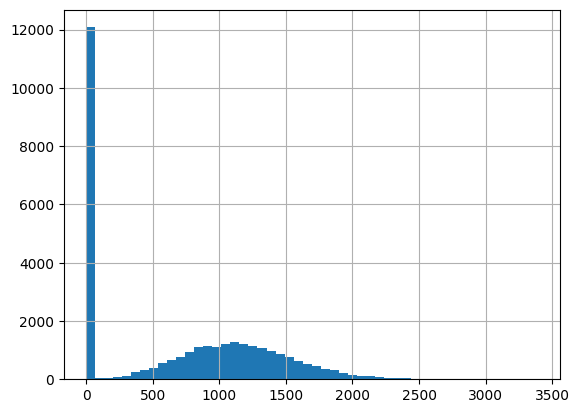

In [84]:
#visualise Untis_sold with a histogram
data['Units_sold'].hist(bins = 50)

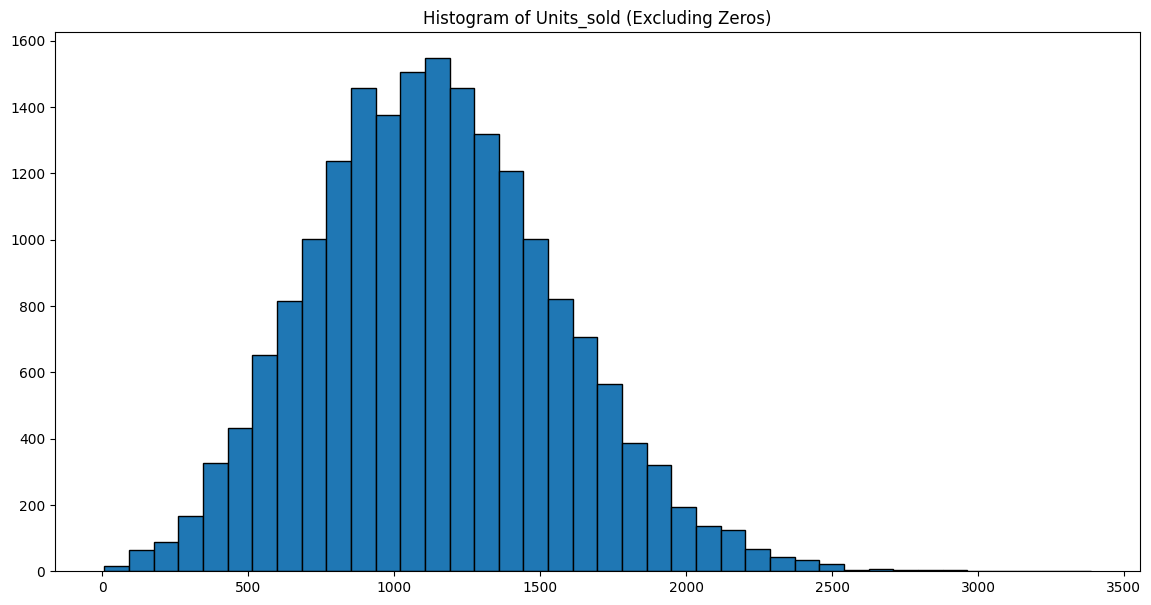

In [85]:
# Filter out the rows where 'Units_sold' is zero
filtered_data = data[data['Units_sold'] > 0]

# Create a histogram for 'Units_sold' without zeros, with 50 bins
plt.figure(figsize=(14, 7))
plt.hist(filtered_data['Units_sold'], bins=40, edgecolor='black')
plt.title('Histogram of Units_sold (Excluding Zeros)')
plt.show()

In [86]:
#check correlation between 'Units_sold' and 'Page_traffic'
data['Page_traffic'].corr(data['Units_sold'])

0.8644533046153509

In [87]:
#check the cases where 'Page_traffic' for a product is 0 and 'Units_sold' is greater than 0
data[(data['Page_traffic'] == 0) & (data['Units_sold']>0)]

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday_x,1_Star_Rating,2_Star_Rating,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline


In [88]:
# Checking the values where Page_traffic > 0 and assigning this dataframe to a new variable - 'data_focus'
data_focus  = data[data['Page_traffic']>0]
data_focus.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday_x,1_Star_Rating,2_Star_Rating,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
105,SKU1011,2021-01-02,4119.0,4650,6.671449,697,Makeup,5,29.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,SKU1011,2021-01-09,4074.0,11435,11.134372,1027,Makeup,5,36.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,SKU1011,2021-01-16,4897.0,11603,11.189007,1037,Makeup,5,38.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,SKU1011,2021-01-23,4783.0,14067,11.880912,1184,Makeup,5,38.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,SKU1011,2021-01-30,3789.0,6188,7.063927,876,Makeup,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
#Checking the shape of data_focus
data_focus.shape

(19631, 30)

In [90]:
data_focus.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Page_traffic,19631.0,3.262629e+03,1.510351e+03,5.000000e+00,2.207000e+03,3.275000e+03,4.249000e+03,1.069600e+04
Revenue($),19631.0,2.285440e+04,9.638144e+03,0.000000e+00,1.648350e+04,2.309800e+04,2.976700e+04,4.857200e+04
Unit_price,19235.0,2.149186e+01,7.845159e+00,1.030303e-01,1.633980e+01,2.070023e+01,2.528073e+01,9.413397e+01
Units_sold,19631.0,1.115604e+03,4.530483e+02,0.000000e+00,8.250000e+02,1.114000e+03,1.410000e+03,3.386000e+03
weekday_x,19631.0,5.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
1_Star_Rating,12020.0,7.505740e+01,4.483497e+01,1.000000e+01,4.000000e+01,6.800000e+01,9.800000e+01,3.010000e+02
2_Star_Rating,11889.0,5.364640e+01,3.160274e+01,7.000000e+00,2.900000e+01,4.900000e+01,7.100000e+01,1.970000e+02
3_Star_Rating,11919.0,1.443993e+02,8.895039e+01,1.600000e+01,7.500000e+01,1.300000e+02,1.920000e+02,5.570000e+02
4_Star_Rating,11832.0,2.955518e+02,1.829261e+02,3.100000e+01,1.560000e+02,2.610000e+02,3.920000e+02,1.180000e+03
5_Star_Rating,11762.0,1.941880e+03,1.230136e+03,1.530000e+02,1.036000e+03,1.701000e+03,2.610750e+03,7.950000e+03


In [91]:
data.describe(include = 'O')

,SKU_ID,Segment
count,31185,31185
unique,297,3
top,SKU1009,Makeup
freq,105,17220


# Video 6 - Treating Missing Values

<p style = 'color:green'><b>Run all the cells above before you begin</b><p>

In [92]:
#check the missing values
data_focus.isnull().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                        396
Units_sold                          0
Segment                             0
weekday_x                           0
1_Star_Rating                    7611
2_Star_Rating                    7742
3_Star_Rating                    7712
4_Star_Rating                    7799
5_Star_Rating                    7869
Image_Count                      5840
Bullet_Count                     5840
Title_Count                      5840
Description_Length               5840
weekday_y                        5840
num_unique_Search_Terms          3583
Organic Search Rank              3583
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video

In [93]:
# Just to understand the example of or how shape works -> 
a = data_focus[data_focus['SKU_ID'] == 'SKU1014'].shape[0]
b = data_focus[data_focus['SKU_ID'] == 'SKU1014'].shape
print(a)
print(b)
data_focus.shape

18
(18, 30)


(19631, 30)

In [94]:
#find the SKU_IDs where Unit_price has null values throughout a particular SKU_ID 
a = data_focus[data_focus['Unit_price'].isnull()]['SKU_ID'].unique()
print (a)

['SKU1014' 'SKU1053' 'SKU106' 'SKU1066' 'SKU1067' 'SKU1072' 'SKU1086'
 'SKU1092' 'SKU118' 'SKU1183' 'SKU123' 'SKU1237' 'SKU1245' 'SKU1270'
 'SKU1317' 'SKU1332' 'SKU1458' 'SKU1459' 'SKU1510' 'SKU1531' 'SKU1546'
 'SKU1597' 'SKU1598' 'SKU1625' 'SKU1628' 'SKU1651' 'SKU1719' 'SKU1723'
 'SKU1733' 'SKU1763' 'SKU183' 'SKU1834' 'SKU1911' 'SKU1954' 'SKU1990'
 'SKU225' 'SKU234' 'SKU257' 'SKU278' 'SKU289' 'SKU300' 'SKU305' 'SKU330'
 'SKU352' 'SKU675' 'SKU731' 'SKU761' 'SKU866' 'SKU930' 'SKU937' 'SKU968'
 'SKU989']


To be more sure, let's use a for loop to calculate the __proportion of missing values__ in the 'Unit_price' column for each unique SKU_ID present in the data_focus dataframe. This only needs to be done for all SKU_IDs with missing values in Unit_price. In case a particular SKU_ID has atleast 1 instance where unit_price is present, we can impute it with that value for that particular SKU_ID. 

In [95]:
#calculate the proportion of missing values in the 'Unit_price' column for those SKU_IDs that have at least one null value in their 'Unit_price' entriesfor i in a:
for i in a:
    print (data_focus[data_focus['SKU_ID']==i]['Unit_price'].isnull().sum()
           /data_focus[data_focus['SKU_ID']==i].shape[0])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [96]:
#impute the 'Unit_price' null values with the median price for each segment again
data_focus['Unit_price'] = data_focus.groupby('Segment')['Unit_price'].transform(lambda x: x.fillna(x.median()))

/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/2110518798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus['Unit_price'] = data_focus.groupby('Segment')['Unit_price'].transform(lambda x: x.fillna(x.median()))


In [97]:
#check the missing values
data_focus.isnull().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
weekday_x                           0
1_Star_Rating                    7611
2_Star_Rating                    7742
3_Star_Rating                    7712
4_Star_Rating                    7799
5_Star_Rating                    7869
Image_Count                      5840
Bullet_Count                     5840
Title_Count                      5840
Description_Length               5840
weekday_y                        5840
num_unique_Search_Terms          3583
Organic Search Rank              3583
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video

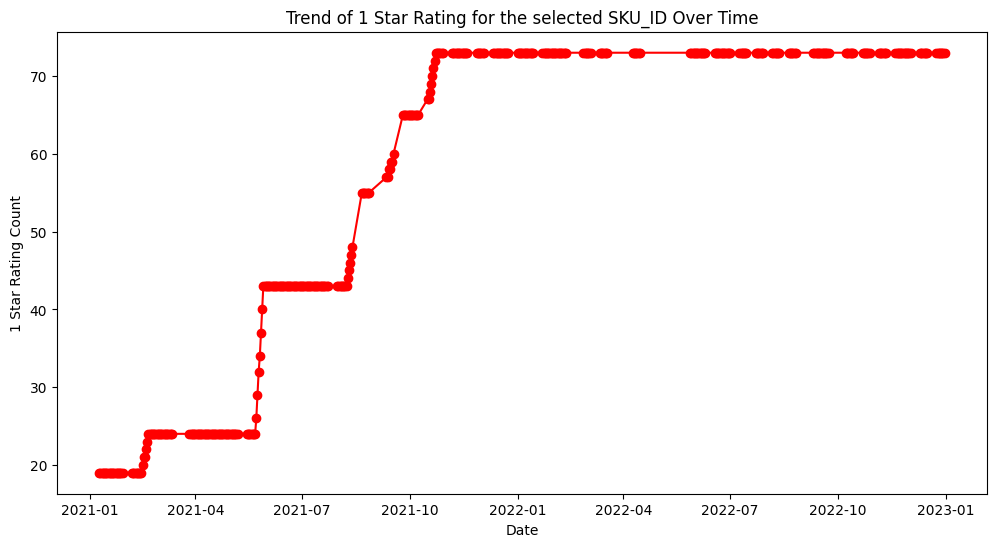

In [98]:
# Filter the data for SKU_ID of your choice
sku_level_data = product[product['SKU_ID'] == 'SKU1410']

# Plotting the trend of 1_Star_Rating for SKU1011 against the Date
plt.figure(figsize=(12, 6))
plt.plot(sku_level_data['Date'], sku_level_data['1_Star_Rating'], color='red', marker='o', linestyle='-')
plt.title("Trend of 1 Star Rating for the selected SKU_ID Over Time")
plt.xlabel("Date")
plt.ylabel("1 Star Rating Count")

plt.show()

In [99]:
#group the data by 'SKU_ID' and apply forward fill to fill the missing values in the specified columns
columns_to_fill = ['1_Star_Rating', '2_Star_Rating', '3_Star_Rating', '4_Star_Rating', '5_Star_Rating']

In [100]:
data_focus.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday_x,1_Star_Rating,2_Star_Rating,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
105,SKU1011,2021-01-02,4119.0,4650,6.671449,697,Makeup,5,29.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,SKU1011,2021-01-09,4074.0,11435,11.134372,1027,Makeup,5,36.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,SKU1011,2021-01-16,4897.0,11603,11.189007,1037,Makeup,5,38.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,SKU1011,2021-01-23,4783.0,14067,11.880912,1184,Makeup,5,38.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,SKU1011,2021-01-30,3789.0,6188,7.063927,876,Makeup,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
#apply the backfill operation within each SKU_ID group for the specified columns
data_focus[columns_to_fill] = data_focus.groupby('SKU_ID')[columns_to_fill].apply(lambda group: group.ffill()).reset_index(level=0, drop=True)

/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/1211191269.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data_focus[columns_to_fill] = data_focus.groupby('SKU_ID')[columns_to_fill].apply(lambda group: group.ffill()).reset_index(level=0, drop=True)
/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/1211191269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_

In [102]:
data_focus.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday_x,1_Star_Rating,2_Star_Rating,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
105,SKU1011,2021-01-02,4119.0,4650,6.671449,697,Makeup,5,46.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,SKU1011,2021-01-09,4074.0,11435,11.134372,1027,Makeup,5,46.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,SKU1011,2021-01-16,4897.0,11603,11.189007,1037,Makeup,5,46.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,SKU1011,2021-01-23,4783.0,14067,11.880912,1184,Makeup,5,46.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,SKU1011,2021-01-30,3789.0,6188,7.063927,876,Makeup,5,46.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#check the missing values
data_focus.isnull().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
weekday_x                           0
1_Star_Rating                    9602
2_Star_Rating                    9689
3_Star_Rating                    9539
4_Star_Rating                    9684
5_Star_Rating                    9809
Image_Count                      5840
Bullet_Count                     5840
Title_Count                      5840
Description_Length               5840
weekday_y                        5840
num_unique_Search_Terms          3583
Organic Search Rank              3583
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video

In [104]:
#fill the remaining null values in the rating columns with 0
data_focus[columns_to_fill] = data_focus[columns_to_fill].fillna(0)

/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/3096414107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[columns_to_fill] = data_focus[columns_to_fill].fillna(0)


In [105]:
#check the missing values
data_focus.isna().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
weekday_x                           0
1_Star_Rating                       0
2_Star_Rating                       0
3_Star_Rating                       0
4_Star_Rating                       0
5_Star_Rating                       0
Image_Count                      5840
Bullet_Count                     5840
Title_Count                      5840
Description_Length               5840
weekday_y                        5840
num_unique_Search_Terms          3583
Organic Search Rank              3583
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video

In [106]:
data_focus.dtypes

SKU_ID                                  object
Date                            datetime64[ns]
Page_traffic                           float64
Revenue($)                               int64
Unit_price                             float64
Units_sold                               int64
Segment                                 object
weekday_x                                int64
1_Star_Rating                          float64
2_Star_Rating                          float64
3_Star_Rating                          float64
4_Star_Rating                          float64
5_Star_Rating                          float64
Image_Count                            float64
Bullet_Count                           float64
Title_Count                            float64
Description_Length                     float64
weekday_y                              float64
num_unique_Search_Terms                float64
Organic Search Rank                    float64
Num_of_Promotions                      float64
Sum of Spend 

In [107]:
#list of columns to fill with the median value within each SKU_ID group
columns_to_fill_with_median = ['Image_Count', 'Bullet_Count', 'Title_Count', 'Description_Length']

In [108]:
#compute the median for each column within each SKU_ID group and fill NA values with that median
for col in columns_to_fill_with_median:
    data_focus[col] = data_focus.groupby('SKU_ID')[col].transform(lambda x: x.fillna(x.median()))

/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/3954361107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[col] = data_focus.groupby('SKU_ID')[col].transform(lambda x: x.fillna(x.median()))
/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/3954361107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[col] = data_focus.groupby('SKU_ID')[col].transform(lambda x: x.fillna(x.median()))
/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/395

In [109]:
#check the missing values
data_focus.isna().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
weekday_x                           0
1_Star_Rating                       0
2_Star_Rating                       0
3_Star_Rating                       0
4_Star_Rating                       0
5_Star_Rating                       0
Image_Count                         3
Bullet_Count                        3
Title_Count                         3
Description_Length                  3
weekday_y                        5840
num_unique_Search_Terms          3583
Organic Search Rank              3583
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video

In [110]:
# Fill the remianing values with median
data_focus[columns_to_fill_with_median] = data_focus[columns_to_fill_with_median].fillna(data_focus[columns_to_fill_with_median].median())

/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/3881958608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[columns_to_fill_with_median] = data_focus[columns_to_fill_with_median].fillna(data_focus[columns_to_fill_with_median].median())


In [111]:
#check missing values
data_focus.isnull().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
weekday_x                           0
1_Star_Rating                       0
2_Star_Rating                       0
3_Star_Rating                       0
4_Star_Rating                       0
5_Star_Rating                       0
Image_Count                         0
Bullet_Count                        0
Title_Count                         0
Description_Length                  0
weekday_y                        5840
num_unique_Search_Terms          3583
Organic Search Rank              3583
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video

In [112]:
data_focus.head(20)


,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday_x,1_Star_Rating,2_Star_Rating,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
105,SKU1011,2021-01-02,4119.0,4650,6.671449,697,Makeup,5,46.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,SKU1011,2021-01-09,4074.0,11435,11.134372,1027,Makeup,5,46.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,SKU1011,2021-01-16,4897.0,11603,11.189007,1037,Makeup,5,46.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,SKU1011,2021-01-23,4783.0,14067,11.880912,1184,Makeup,5,46.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,SKU1011,2021-01-30,3789.0,6188,7.063927,876,Makeup,5,46.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,SKU1011,2021-02-06,3245.0,3571,4.525982,789,Makeup,5,46.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,SKU1011,2021-02-13,3972.0,6504,7.316085,889,Makeup,5,46.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,SKU1011,2021-02-20,2887.0,4699,5.837267,805,Makeup,5,47.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,SKU1011,2021-02-27,3047.0,2017,2.527569,798,Makeup,5,47.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,SKU1011,2021-03-06,3120.0,5118,5.985965,855,Makeup,5,55.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Video 7 - Treating Missing Values - Part 2

In [113]:
#apply the backfill operation within each SKU_ID group for the specified columns
data_focus['Organic Search Rank'] = data_focus.groupby('SKU_ID')['Organic Search Rank'].apply(lambda group: group.ffill()).reset_index(level=0, drop=True)

/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/3026562778.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data_focus['Organic Search Rank'] = data_focus.groupby('SKU_ID')['Organic Search Rank'].apply(lambda group: group.ffill()).reset_index(level=0, drop=True)
/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/3026562778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [114]:
#check missing values
data_focus.isnull().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
weekday_x                           0
1_Star_Rating                       0
2_Star_Rating                       0
3_Star_Rating                       0
4_Star_Rating                       0
5_Star_Rating                       0
Image_Count                         0
Bullet_Count                        0
Title_Count                         0
Description_Length                  0
weekday_y                        5840
num_unique_Search_Terms          3583
Organic Search Rank              8212
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video

In [115]:
#apply the backfill operation within each SKU_ID group for the specified columns
data_focus['Organic Search Rank'] = data_focus.groupby('Segment')['Organic Search Rank'].transform(lambda x: x.fillna(x.median()))

/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/2911223777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus['Organic Search Rank'] = data_focus.groupby('Segment')['Organic Search Rank'].transform(lambda x: x.fillna(x.median()))


In [116]:
#check the missing values
data_focus.isnull().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
weekday_x                           0
1_Star_Rating                       0
2_Star_Rating                       0
3_Star_Rating                       0
4_Star_Rating                       0
5_Star_Rating                       0
Image_Count                         0
Bullet_Count                        0
Title_Count                         0
Description_Length                  0
weekday_y                        5840
num_unique_Search_Terms          3583
Organic Search Rank                 0
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video

In [117]:
#fill the null values in 'num_unique_Search_Terms', 'Organic Search Rank' with 0
data_focus['num_unique_Search_Terms'] = data_focus['num_unique_Search_Terms'].fillna(0)

/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/1597357358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus['num_unique_Search_Terms'] = data_focus['num_unique_Search_Terms'].fillna(0)


In [118]:
#check missing values
data_focus.isnull().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
weekday_x                           0
1_Star_Rating                       0
2_Star_Rating                       0
3_Star_Rating                       0
4_Star_Rating                       0
5_Star_Rating                       0
Image_Count                         0
Bullet_Count                        0
Title_Count                         0
Description_Length                  0
weekday_y                        5840
num_unique_Search_Terms             0
Organic Search Rank                 0
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video

In [119]:
#create list with the name of the columns
columns_to_fill_2 = ['Sum of Spend', 'Num_of_Promotions']

In [120]:
#fill the missing values in the list with 0
data_focus[columns_to_fill_2] = data_focus[columns_to_fill_2].fillna(0)

/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/2591522211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[columns_to_fill_2] = data_focus[columns_to_fill_2].fillna(0)


In [121]:
#check missing values
data_focus.isnull().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
weekday_x                           0
1_Star_Rating                       0
2_Star_Rating                       0
3_Star_Rating                       0
4_Star_Rating                       0
5_Star_Rating                       0
Image_Count                         0
Bullet_Count                        0
Title_Count                         0
Description_Length                  0
weekday_y                        5840
num_unique_Search_Terms             0
Organic Search Rank                 0
Num_of_Promotions                   0
Sum of Spend                        0
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video

In [122]:
#create a list with the column names to be imputed
columns_to_fill_3 = ['Online_Clicks', 'Online_Cost', 'Online_Impressions', 'num_unique_campaigns']

In [123]:
#impute the values with 0
data_focus[columns_to_fill_3] = data_focus[columns_to_fill_3].fillna(0)

/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/3382507709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[columns_to_fill_3] = data_focus[columns_to_fill_3].fillna(0)


In [124]:
#check missing values
data_focus.isnull().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
weekday_x                           0
1_Star_Rating                       0
2_Star_Rating                       0
3_Star_Rating                       0
4_Star_Rating                       0
5_Star_Rating                       0
Image_Count                         0
Bullet_Count                        0
Title_Count                         0
Description_Length                  0
weekday_y                        5840
num_unique_Search_Terms             0
Organic Search Rank                 0
Num_of_Promotions                   0
Sum of Spend                        0
Online_Clicks                       0
Online_Cost                         0
Online_Impressions                  0
num_unique_campaigns                0
Clicks_video

In [125]:
#filling the rest of the null values with 0
data_focus.fillna(0, inplace=True)

/var/folders/v4/l97jdzmd39x8pyw2sy1sltm00000gn/T/ipykernel_39302/79077496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus.fillna(0, inplace=True)


In [126]:
#check missing values
data_focus.isnull().sum()

SKU_ID                          0
Date                            0
Page_traffic                    0
Revenue($)                      0
Unit_price                      0
Units_sold                      0
Segment                         0
weekday_x                       0
1_Star_Rating                   0
2_Star_Rating                   0
3_Star_Rating                   0
4_Star_Rating                   0
5_Star_Rating                   0
Image_Count                     0
Bullet_Count                    0
Title_Count                     0
Description_Length              0
weekday_y                       0
num_unique_Search_Terms         0
Organic Search Rank             0
Num_of_Promotions               0
Sum of Spend                    0
Online_Clicks                   0
Online_Cost                     0
Online_Impressions              0
num_unique_campaigns            0
Clicks_video                    0
Cost_video                      0
Impressions_video               0
num_unique_cam

# Video 9 - Preparing the Dataset for classification, regression and unsupervised problems

### Unsupervised Models 

In [127]:
#exporting the dataframe to the specified path
 #file_path = '/Users/admin/Desktop/Synergix_data_preprocessed_unsupervised_new.csv'
# data_focus.to_csv(file_path, index=False)

### Supervised Models

In [128]:
#shuffle data_focus using pd.sample
data_final = data_focus.sample(frac = 1, random_state=1)
data_final.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday_x,1_Star_Rating,2_Star_Rating,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
11196,SKU1539,2022-04-09,5835.0,46006,22.214389,2071,Skincare,5,97.0,75.0,...,0.0,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0
8628,SKU1431,2021-05-08,1881.0,8084,11.870778,681,Skincare,5,114.0,74.0,...,0.0,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0
31078,SKU995,2022-12-24,2477.0,24190,27.645714,875,Makeup,5,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
3032,SKU1136,2022-10-08,4087.0,23588,16.896848,1396,Makeup,5,50.0,21.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
23269,SKU528,2022-03-26,1446.0,13446,16.357664,822,Hair Care,5,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0


In [129]:
#check the shape of the data
data_final.shape, data_focus.shape

((19631, 30), (19631, 30))

In [130]:
#creating the variable for classification model
data_final['Units_sold>1000'] = (data_final.Units_sold > 1000)*1

In [131]:
#check the dataframe
data_final.columns

Index(['SKU_ID', 'Date', 'Page_traffic', 'Revenue($)', 'Unit_price',
       'Units_sold', 'Segment', 'weekday_x', '1_Star_Rating', '2_Star_Rating',
       '3_Star_Rating', '4_Star_Rating', '5_Star_Rating', 'Image_Count',
       'Bullet_Count', 'Title_Count', 'Description_Length', 'weekday_y',
       'num_unique_Search_Terms', 'Organic Search Rank', 'Num_of_Promotions',
       'Sum of Spend', 'Online_Clicks', 'Online_Cost', 'Online_Impressions',
       'num_unique_campaigns', 'Clicks_video', 'Cost_video',
       'Impressions_video', 'num_unique_campaigns_offline', 'Units_sold>1000'],
      dtype='object')

In [132]:
data_final.count()

SKU_ID                          19631
Date                            19631
Page_traffic                    19631
Revenue($)                      19631
Unit_price                      19631
Units_sold                      19631
Segment                         19631
weekday_x                       19631
1_Star_Rating                   19631
2_Star_Rating                   19631
3_Star_Rating                   19631
4_Star_Rating                   19631
5_Star_Rating                   19631
Image_Count                     19631
Bullet_Count                    19631
Title_Count                     19631
Description_Length              19631
weekday_y                       19631
num_unique_Search_Terms         19631
Organic Search Rank             19631
Num_of_Promotions               19631
Sum of Spend                    19631
Online_Clicks                   19631
Online_Cost                     19631
Online_Impressions              19631
num_unique_campaigns            19631
Clicks_video

In [133]:
data_final['Units_sold'].count()


19631

### Removing irrelvant columns for ML

From the columns listed above we can see 3 columns that are of no use in a supervised model. And they are 'Date', 'SKU_ID' and "Revenue($). The reasons for deleting them are listed below-

1. We are removing the 'Date' column since we are not looking to derive any time related insights from the data.
2. 'Revenue' is already a part of Units_sold (Units_sold = Revenue/Unit_price). So we can remove 'Revenue($)'.
3. "SKU_ID' is nothing but the identity of the product. Theere is no information in this column that our model can extract. 

One thing to keep in mind is that the date column can be used in the advanced ML portion when we teach you feature engineering. So let's create 2 versions for supervised data. One with the date and one without all the 3 columns mentioned above.

First let's create the data_fe dataframe which will have the date column but not the 'SKU_ID' and 'Revenue($)' column.

In [134]:
#deleting the irrelevant columns
data_fe = data_final.drop(['SKU_ID', 'Revenue($)'], axis=1)
data_fe.head()

,Date,Page_traffic,Unit_price,Units_sold,Segment,weekday_x,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000
11196,2022-04-09,5835.0,22.214389,2071,Skincare,5,97.0,75.0,203.0,361.0,...,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1
8628,2021-05-08,1881.0,11.870778,681,Skincare,5,114.0,74.0,193.0,447.0,...,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,0
31078,2022-12-24,2477.0,27.645714,875,Makeup,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0
3032,2022-10-08,4087.0,16.896848,1396,Makeup,5,50.0,21.0,53.0,141.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1
23269,2022-03-26,1446.0,16.357664,822,Hair Care,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0


In [135]:
#exporting the file to the specified location
#file_path = '/Users/admin/Desktop/Synergix_data_fe_new.csv'
#data_final.to_csv(file_path, index=False)

In [136]:
#deleting the irrelevant columns
data_final.drop(['Date', 'SKU_ID', 'Revenue($)'], axis=1, inplace=True)

In [137]:
#exporting the file to the specified location
#file_path = '/Users/admin/Desktop/Synergix_data_preprocessed_new.csv'
#data_final.to_csv(file_path, index=False)